## Libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

## Input Data

In [2]:
XLabels = [
    '2021 April',
    '2021 May',
    '2021 June',
    '2021 July',
    '2021 Aug',
    '2021 Sept',
    '2021 Oct',
    '2021 Nov',
    '2021 Dec',
    '2022 Jan',
    '2022 Feb',
    '2022 Mar',
]

XLabels

['2021 April',
 '2021 May',
 '2021 June',
 '2021 July',
 '2021 Aug',
 '2021 Sept',
 '2021 Oct',
 '2021 Nov',
 '2021 Dec',
 '2022 Jan',
 '2022 Feb',
 '2022 Mar']

In [3]:
X = np.arange(1,13)
X

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [4]:
Y = [
    349616.192,
    5928118.964,
    2980997.06,
    3730427.07,
    3547844.75010,
    3736361.94,
    2622989.83,
    2143935.2897,
    2564486.2256,
    3429940.68,
    2766592.18,
    893836.37
]

Y

[349616.192,
 5928118.964,
 2980997.06,
 3730427.07,
 3547844.7501,
 3736361.94,
 2622989.83,
 2143935.2897,
 2564486.2256,
 3429940.68,
 2766592.18,
 893836.37]

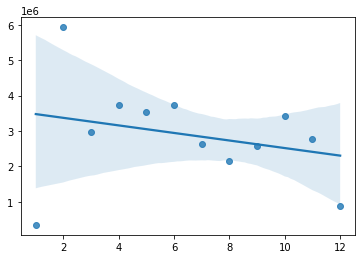

In [5]:
plot_deg_1 = sns.regplot(x=X, y=Y)

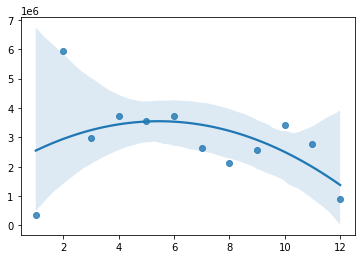

In [6]:
plot_deg_2 = sns.regplot(x=X, y=Y, order=2)

C:\Anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))


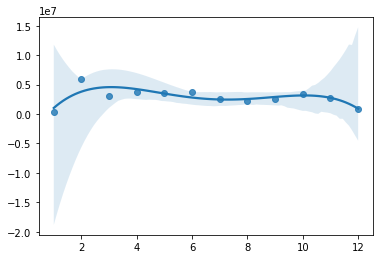

In [7]:
plot_deg_4 = sns.regplot(x=X, y=Y, order=4)

## Regression (Order = 1)

In [8]:

regr = linear_model.LinearRegression()
X = np.array(X).reshape(-1, 1)
Y = np.array(Y).reshape(-1, 1)
regr.fit(X, Y)
print(regr.coef_[0])
print(regr.intercept_)

[-106571.74290629]
[3583978.54150758]


In [9]:
test = np.array([13,14,15,16,17,18]).reshape(-1,1)

In [10]:
line_X = np.concatenate((X.reshape(1, -1)[0], test.reshape(1,-1)[0]))
line_X

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18])

In [11]:
y_predicted = regr.predict(line_X.reshape(-1,1))
y_predicted

array([[3477406.79860128],
       [3370835.05569499],
       [3264263.31278869],
       [3157691.5698824 ],
       [3051119.82697611],
       [2944548.08406981],
       [2837976.34116352],
       [2731404.59825723],
       [2624832.85535093],
       [2518261.11244464],
       [2411689.36953835],
       [2305117.62663205],
       [2198545.88372576],
       [2091974.14081946],
       [1985402.39791317],
       [1878830.65500688],
       [1772258.91210058],
       [1665687.16919429]])

In [12]:
y_test = y_predicted.reshape(1,-1)[0]
y_test

array([3477406.79860128, 3370835.05569499, 3264263.31278869,
       3157691.5698824 , 3051119.82697611, 2944548.08406981,
       2837976.34116352, 2731404.59825723, 2624832.85535093,
       2518261.11244464, 2411689.36953835, 2305117.62663205,
       2198545.88372576, 2091974.14081946, 1985402.39791317,
       1878830.65500688, 1772258.91210058, 1665687.16919429])

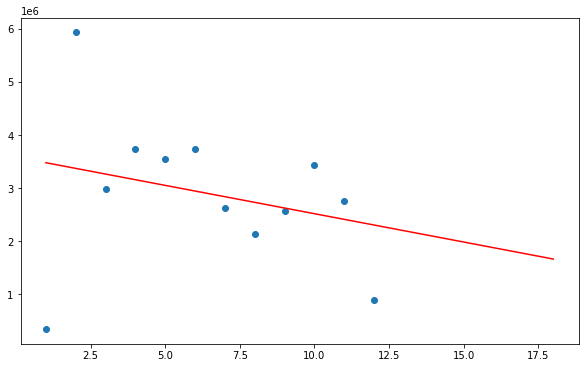

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(X, Y)
plt.plot(line_X, y_test, c='red')
plt.show()

In [14]:
r2_score(Y, y_test[:12])

0.07195102017371169

In [15]:
mean_squared_error(Y, y_test[:12])

1745713095789.3381

## Regression (Order = 2)

In [16]:

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X)
poly_reg_model = linear_model.LinearRegression()
poly_reg_model.fit(poly_features, Y)

LinearRegression()

In [17]:
line_X = np.concatenate((X.reshape(1, -1)[0], test.reshape(1,-1)[0]))
line_X

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18])

In [18]:
poly_test = poly.fit_transform(line_X.reshape(-1,1))
y_predicted = poly_reg_model.predict(poly_test)
y_predicted

array([[ 2550282.93468462],
       [ 2949415.11755105],
       [ 3247406.51526294],
       [ 3444257.12782028],
       [ 3539966.95522308],
       [ 3534535.99747133],
       [ 3427964.25456503],
       [ 3220251.7265042 ],
       [ 2911398.41328881],
       [ 2501404.31491888],
       [ 1990269.4313944 ],
       [ 1377993.76271538],
       [  664577.30888182],
       [ -149979.9301063 ],
       [-1065677.95424895],
       [-2082516.76354615],
       [-3200496.3579979 ],
       [-4419616.7376042 ]])

In [19]:
y_test = y_predicted.reshape(1,-1)[0]
y_test

array([ 2550282.93468462,  2949415.11755105,  3247406.51526294,
        3444257.12782028,  3539966.95522308,  3534535.99747133,
        3427964.25456503,  3220251.7265042 ,  2911398.41328881,
        2501404.31491888,  1990269.4313944 ,  1377993.76271538,
         664577.30888182,  -149979.9301063 , -1065677.95424895,
       -2082516.76354615, -3200496.3579979 , -4419616.7376042 ])

In [20]:
line_X

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18])

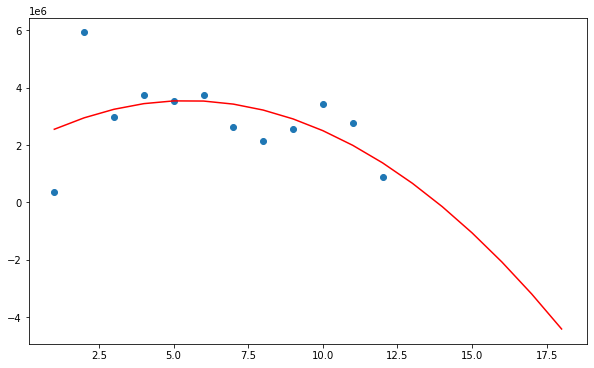

In [21]:
plt.figure(figsize=(10,6))
plt.scatter(X, Y)
plt.plot(line_X, y_test, c='red')
plt.show()

In [22]:
r2_score(Y, y_test[:12])

0.2231616234157512

In [23]:
mean_squared_error(Y, y_test[:12])

1461277321342.1277

## Regression (Order = 4)

In [24]:
poly = PolynomialFeatures(degree=4, include_bias=False)

In [25]:
poly_features = poly.fit_transform(X)
poly_reg_model = linear_model.LinearRegression()
poly_reg_model.fit(poly_features, Y)

LinearRegression()

In [26]:
poly_test = poly.fit_transform(line_X.reshape(-1,1))
y_predicted = poly_reg_model.predict(poly_test)
y_predicted

array([[ 1.03487635e+06],
       [ 3.80872243e+06],
       [ 4.57252770e+06],
       [ 4.23152088e+06],
       [ 3.48048063e+06],
       [ 2.80373555e+06],
       [ 2.47516418e+06],
       [ 2.55819497e+06],
       [ 2.90580634e+06],
       [ 3.16052660e+06],
       [ 2.75443405e+06],
       [ 9.09156872e+05],
       [-3.36412678e+06],
       [-1.12646888e+07],
       [-2.42022513e+07],
       [-4.37969862e+07],
       [-7.18795157e+07],
       [-1.10490912e+08]])

In [27]:
y_test = y_predicted.reshape(1,-1)[0]
y_test

array([ 1.03487635e+06,  3.80872243e+06,  4.57252770e+06,  4.23152088e+06,
        3.48048063e+06,  2.80373555e+06,  2.47516418e+06,  2.55819497e+06,
        2.90580634e+06,  3.16052660e+06,  2.75443405e+06,  9.09156872e+05,
       -3.36412678e+06, -1.12646888e+07, -2.42022513e+07, -4.37969862e+07,
       -7.18795157e+07, -1.10490912e+08])

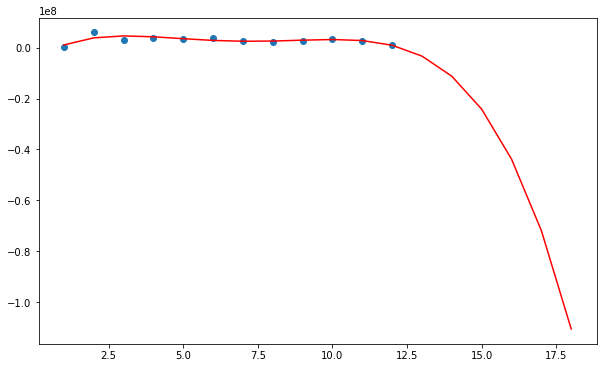

In [28]:
plt.figure(figsize=(10,6))
plt.scatter(X, Y)
plt.plot(line_X, y_test, c='red')
plt.show()

In [29]:
r2_score(Y, y_test[:12])

0.6011663082920561

In [30]:
mean_squared_error(Y, y_test[:12])

750228935962.9369

In [31]:
print(-3.36412678e+06, -1.12646888e+07, -2.42022513e+07, -4.37969862e+07,
       -7.18795157e+07, -1.10490912e+08)

-3364126.78 -11264688.8 -24202251.3 -43796986.2 -71879515.7 -110490912.0


## Regression (Order = 6)

In [32]:
poly = PolynomialFeatures(degree=6, include_bias=False)

In [33]:
poly_features = poly.fit_transform(X)
poly_reg_model = linear_model.LinearRegression()
poly_reg_model.fit(poly_features, Y)

LinearRegression()

In [34]:
poly_test = poly.fit_transform(line_X.reshape(-1,1))
y_predicted = poly_reg_model.predict(poly_test)
y_predicted

array([[ 5.63391266e+05],
       [ 4.97707592e+06],
       [ 4.34160845e+06],
       [ 3.36489031e+06],
       [ 3.16647397e+06],
       [ 3.30458734e+06],
       [ 3.15421288e+06],
       [ 2.63622153e+06],
       [ 2.29756129e+06],
       [ 2.74250059e+06],
       [ 3.41492632e+06],
       [ 7.31696689e+05],
       [-1.44329513e+07],
       [-5.99119394e+07],
       [-1.66058832e+08],
       [-3.80210262e+08],
       [-7.71797308e+08],
       [-1.43810581e+09]])

In [35]:
y_test = y_predicted.reshape(1,-1)[0]
y_test

array([ 5.63391266e+05,  4.97707592e+06,  4.34160845e+06,  3.36489031e+06,
        3.16647397e+06,  3.30458734e+06,  3.15421288e+06,  2.63622153e+06,
        2.29756129e+06,  2.74250059e+06,  3.41492632e+06,  7.31696689e+05,
       -1.44329513e+07, -5.99119394e+07, -1.66058832e+08, -3.80210262e+08,
       -7.71797308e+08, -1.43810581e+09])

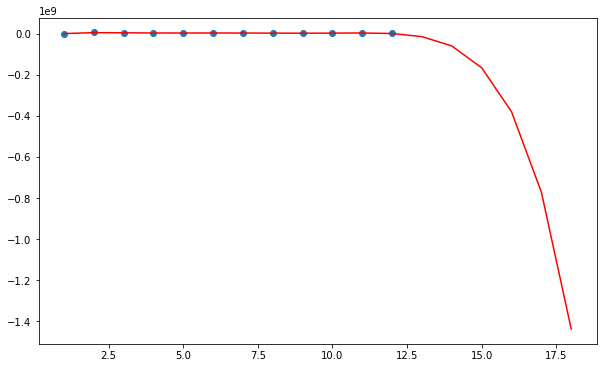

In [36]:
plt.figure(figsize=(10,6))
plt.scatter(X, Y)
plt.plot(line_X, y_test, c='red')
plt.show()

In [37]:
r2_score(Y, y_test[:12])

0.7881541767950476

In [38]:
mean_squared_error(Y, y_test[:12])

398494083713.53564